In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
# Read in data for sentiment analysis
path = r'C:/Users/Chris/OneDrive/Desktop/Data/Lazada Reviews' 
df = pd.read_csv(path + '//Lazada_Reviews.csv')
print(df)

        Unnamed: 0                                        review_text  \
0                0  This app is a big step in right direction - gr...   
1                1  This is what I have been looking for. Now I ca...   
2                2  Its a great way of shopping online. But please...   
3                3                       Thanks lazada for this app!!   
4                4                                        Good app ;)   
...            ...                                                ...   
775318      775318                                               nice   
775319      775319                                               Nice   
775320      775320                                 thanks super sulit   
775321      775321  1 of the best online shopping app because of t...   
775322      775322                                               Good   

        review_rating              author_id    author_name  \
0                   5  109329*********902682  A Google user 

In [3]:
# Fix data types
print('Before change', df.dtypes)
df['review_datetime_utc'] = pd.to_datetime(df['review_datetime_utc'], format = '%Y-%m-%dT%H:%M:%S.000Z')
print('\nAfter change', df.dtypes)

Before change Unnamed: 0              int64
review_text            object
review_rating           int64
author_id              object
author_name            object
author_app_version     object
review_datetime_utc    object
review_likes            int64
dtype: object

After change Unnamed: 0                      int64
review_text                    object
review_rating                   int64
author_id                      object
author_name                    object
author_app_version             object
review_datetime_utc    datetime64[ns]
review_likes                    int64
dtype: object


In [4]:
# Rename columns for readability
df = df.rename(columns = {'Unnamed: 0' : 'id', 'review_datetime_utc' : 'review_datetime'})
df.head(5)

,id,review_text,review_rating,author_id,author_name,author_app_version,review_datetime,review_likes
0,0,This app is a big step in right direction - gr...,5,109329*********902682,A Google user,1.0,2013-06-09 08:34:37,2
1,1,This is what I have been looking for. Now I ca...,5,109886*********190000,A Google user,1.0,2013-06-09 09:29:25,0
2,2,Its a great way of shopping online. But please...,1,114358*********899063,A Google user,1.0,2013-06-09 10:19:39,0
3,3,Thanks lazada for this app!!,5,108006*********600292,A Google user,1.0,2013-06-10 02:24:14,0
4,4,Good app ;),5,110676*********237626,A Google user,1.0,2013-06-10 02:35:53,0


In [5]:
# Drop unnecessary columns for the sentiment analysis
df = df.drop(columns = ['author_id'])
df.shape

(775323, 7)

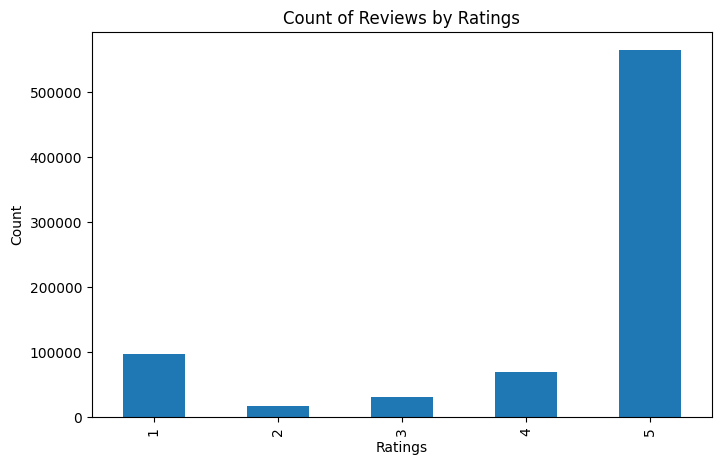

In [6]:
# Simple EDA to understand our general sentiment by ratings
ax = df['review_rating'].value_counts().sort_index() \
    .plot(kind = 'bar',
          title = 'Count of Reviews by Ratings',
          figsize = (8,5))
ax.set_xlabel('Ratings')
ax.set_ylabel('Count')
plt.show() # Dataset strongly skewed towards positive reviews

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [ ]:
# Run polarity score on review text
res = {}
for i, row in df.iterrows():
    txt = str(row['review_text'])
    id = row['id']
    res[id] = sia.polarity_scores(txt) 

In [21]:
vader = pd.DataFrame(res).T
vader

,neg,neu,pos,compound
0,0.000,0.722,0.278,0.9548
1,0.000,0.880,0.120,0.5079
2,0.055,0.647,0.298,0.7992
3,0.000,0.534,0.466,0.5399
4,0.000,0.172,0.828,0.5859
...,...,...,...,...
775318,0.000,0.000,1.000,0.4215
775319,0.000,0.000,1.000,0.4215
775320,0.000,0.128,0.872,0.7783
775321,0.000,0.821,0.179,0.7438


In [22]:
vader = vader.reset_index().rename(columns = {'index' : 'id'})
print(vader)

            id    neg    neu    pos  compound
0            0  0.000  0.722  0.278    0.9548
1            1  0.000  0.880  0.120    0.5079
2            2  0.055  0.647  0.298    0.7992
3            3  0.000  0.534  0.466    0.5399
4            4  0.000  0.172  0.828    0.5859
...        ...    ...    ...    ...       ...
775318  775318  0.000  0.000  1.000    0.4215
775319  775319  0.000  0.000  1.000    0.4215
775320  775320  0.000  0.128  0.872    0.7783
775321  775321  0.000  0.821  0.179    0.7438
775322  775322  0.000  0.000  1.000    0.4404

[775323 rows x 5 columns]


In [25]:
vaders = vader.merge(df, how = 'left', on = 'id')
vaders.head(10)

,id,neg,neu,pos,compound,review_text,review_rating,author_name,author_app_version,review_datetime,review_likes
0,0,0.000,0.722,0.278,0.9548,This app is a big step in right direction - gr...,5,A Google user,1.0,2013-06-09 08:34:37,2
1,1,0.000,0.880,0.120,0.5079,This is what I have been looking for. Now I ca...,5,A Google user,1.0,2013-06-09 09:29:25,0
2,2,0.055,0.647,0.298,0.7992,Its a great way of shopping online. But please...,1,A Google user,1.0,2013-06-09 10:19:39,0
3,3,0.000,0.534,0.466,0.5399,Thanks lazada for this app!!,5,A Google user,1.0,2013-06-10 02:24:14,0
4,4,0.000,0.172,0.828,0.5859,Good app ;),5,A Google user,1.0,2013-06-10 02:35:53,0
5,5,0.000,0.775,0.225,0.4927,Now I can shopping at everywhere with this app...,5,A Google user,1.0,2013-06-10 04:00:38,0
6,6,0.000,1.000,0.000,0.0000,"Mình cài app này rùi, get voucher code lun rùi...",5,A Google user,1.0,2013-06-10 04:55:24,0
7,7,0.000,1.000,0.000,0.0000,Found this when I wanted to see product review...,5,A Google user,1.0,2013-06-10 05:53:40,0
8,8,0.062,0.520,0.418,0.9706,Very useful for those who want to shop right o...,5,A Google user,1.0,2013-06-10 06:26:37,7
9,9,0.000,1.000,0.000,0.0000,Keren udah ada aplikasi android nya!,5,A Google user,1.0,2013-06-10 06:54:43,0


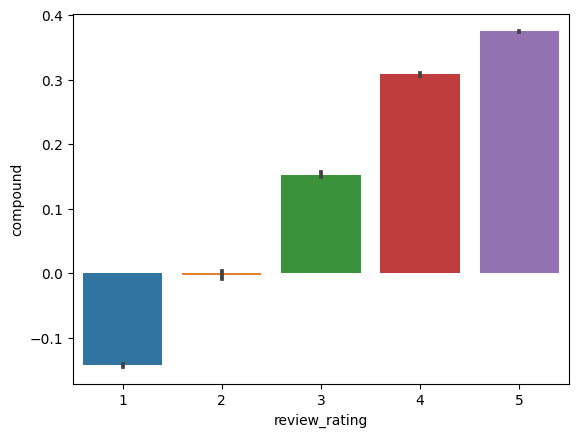

In [41]:
sns.barplot(data = vaders, x = 'review_rating', y = 'compound')
plt.show()

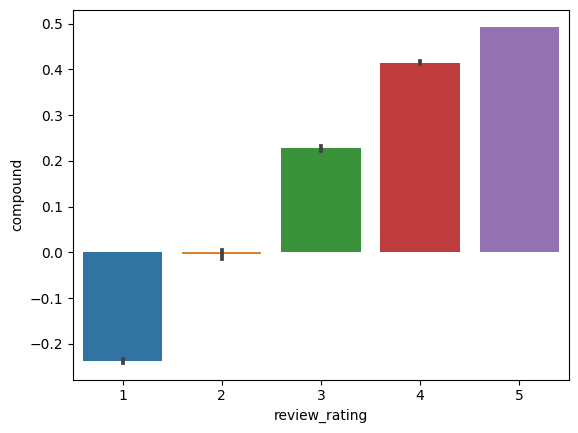

In [43]:
vaders_rm_amb = vaders[~(vaders['compound'] == 0.0)]
sns.barplot(data = vaders_rm_amb, x = 'review_rating', y = 'compound')
plt.show() # New plot without ambigious compound score of 0.0; improved compound scores, high ratings corresponds to higher higher compound score and vice versa 

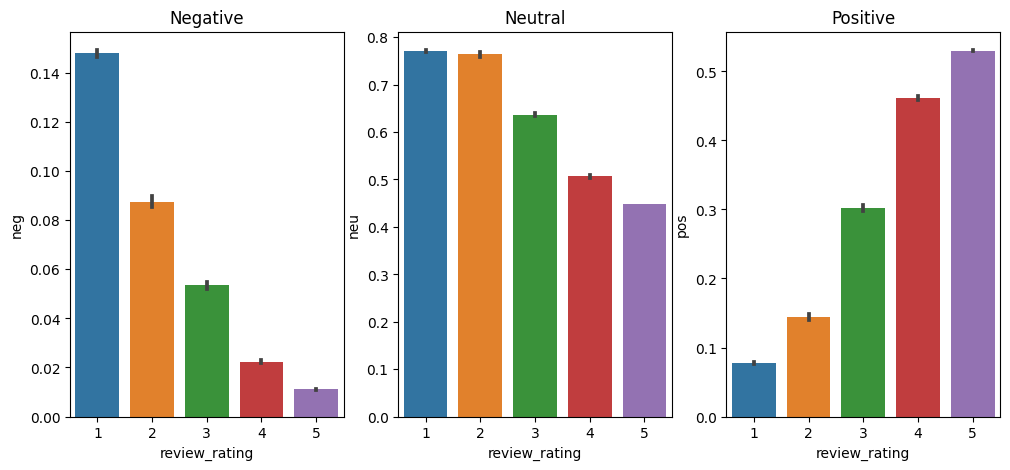

' Fairly accurate sentiment analysis, with strong negative correlating to a 1 star review and a strong positive for 5 star reviews.\nHowever, neutral reviews tended to have a stronger neutral for lower ratings than higher ratings, due to language differences of ASEAN region.\n'

In [42]:
fig, axs = plt.subplots(1, 3, figsize = (12, 5))
sns.barplot(data = vaders, x = 'review_rating', y = 'neg', ax = axs[0])
sns.barplot(data = vaders, x = 'review_rating', y = 'neu', ax = axs[1])
sns.barplot(data = vaders, x = 'review_rating', y = 'pos', ax = axs[2])
axs[0].set_title('Negative')
axs[1].set_title('Neutral')
axs[2].set_title('Positive')
plt.show()

''' 
Fairly accurate sentiment analysis, with strong negative correlating to a 1 star review and a strong positive for 5 star reviews.
However, neutral reviews tended to have a stronger neutral for lower ratings than higher ratings, due to language differences of ASEAN region.

Limitations
Ambiguity in neutral text: different languages of ASEAN region
'''

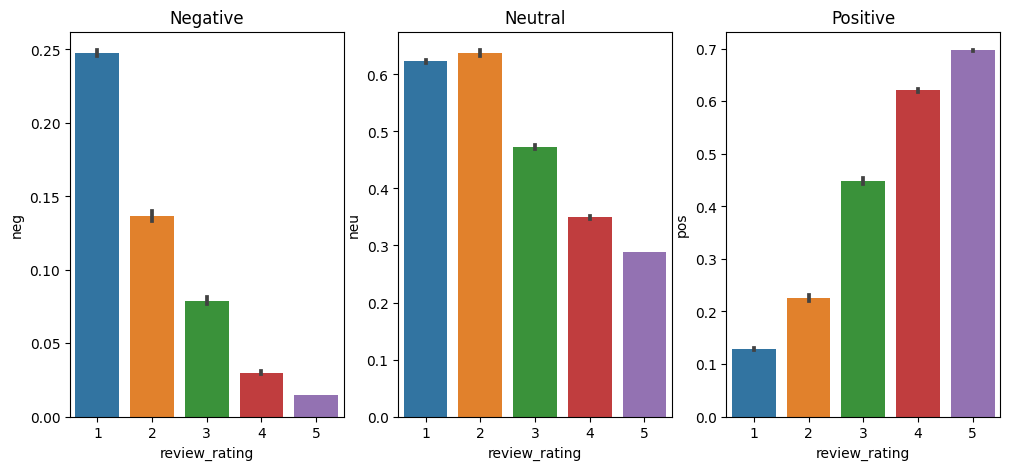

In [44]:
fig, axs = plt.subplots(1, 3, figsize = (12, 5))
sns.barplot(data = vaders_rm_amb, x = 'review_rating', y = 'neg', ax = axs[0])
sns.barplot(data = vaders_rm_amb, x = 'review_rating', y = 'neu', ax = axs[1])
sns.barplot(data = vaders_rm_amb, x = 'review_rating', y = 'pos', ax = axs[2])
axs[0].set_title('Negative')
axs[1].set_title('Neutral')
axs[2].set_title('Positive')
plt.show()

'''
Correcting for ambiguity as unregistered languages had high neutral scores and low compound scores which brought down the averages of vaders scores
'''